## Problem 1

In [1]:
df = read.csv("movieData.csv")
X = as.matrix(df[1:2])
Y = as.matrix(df["Watched"])
X0 = rep(1, nrow(X))
Xnew = cbind(X0,X)
set.seed(123)
W = runif(3, -1, 1)
wold = W

### Question 1

In [2]:
check = T
i = 1
while (check){
    i = i + 1
    result = Xnew %*% wold 
    prediction = ifelse(result > 0, 1, -1)
    compare = prediction == Y
    check = !all(compare)
    print(check)
    if (check){
        xn = as.matrix(unname(Xnew[compare==FALSE,,drop=F][1,]))
        yn = as.matrix(Y[compare==FALSE][1])
        xnyn = xn %*% yn
        wnew = wold + xnyn
        wold = wnew
    }else{
        cat("After",i,",the algorithm converge")
    }
}


[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[

In [63]:
wnew

-26.42484
-4.42339
10.11795


In [64]:
df$Watched = as.factor(df$Watched)

In [65]:
str(df)

'data.frame':	13 obs. of  3 variables:
 $ LevelOfViolence: int  1 1 1 2 2 3 5 4 1 3 ...
 $ CriticsRating  : num  1.2 3.5 4.2 3.9 2.8 3 4.5 1.8 2.1 4.8 ...
 $ Watched        : Factor w/ 2 levels "-1","1": 1 2 2 2 1 1 1 1 1 2 ...


### Question 2

In [4]:
library(ggplot2)

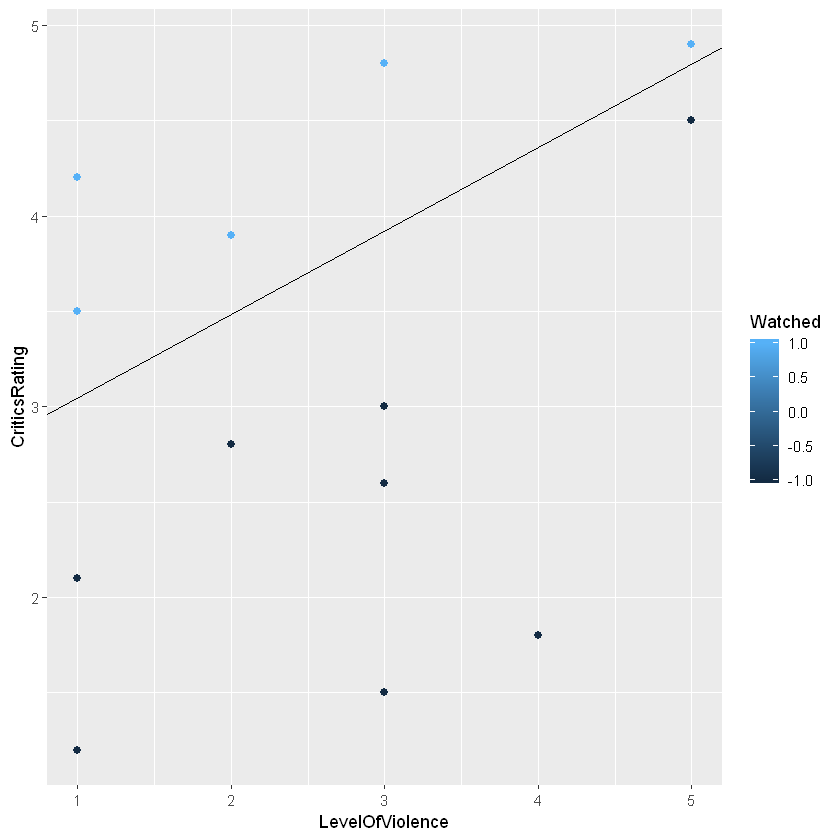

In [6]:
ggplot(df, aes(x = LevelOfViolence, y = CriticsRating, colour = Watched)) +
    geom_point(size = 2) + 
    geom_abline(intercept = -wold[1]/wold[3], slope = -wold[2]/wold[3])

## Problem 2

### Question 1

In [20]:
tanh = function(x){
    ans = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
    return (ans)
}

In [21]:
df2 = read.csv("siCoData.csv")

In [29]:
X

1.0000000
0.6248613


In [22]:
# Initial W
set.seed(123)

initialfirstW = matrix(runif(6, min = 0, max = 1), nrow = 2) # 2 by 3

set.seed(123)
initialsecondW = matrix(runif(4, min = 0, max = 1), nrow = 1) # 1 by 4

# Split X and y
xdata = rbind(rep(1,nrow(df2)), df2[,1])
ydata = matrix(df2[,2], nrow = 1)

iteration = 0
N = nrow(df2)

for(j in 1:20000){
    sum = 0
    set.seed(123)
    shuffle = sample(N)
    xdata = xdata[,shuffle]
    ydata = matrix(ydata[,shuffle], nrow = 1)
    for (i in 1:nrow(df2)){
        
        # Forward Calculation
        X = matrix(xdata[,i]) # 2 by 1
        y = ydata[,i]
        s1 = t(initialfirstW) %*% X # (3 by 2) %*% (2 by 1)
        thetas1 = tanh(s1)
        s2 = initialsecondW %*% rbind(1, thetas1) # (1 by 4) %*% (4 by 1)
        error = (s2 - y)^2
        sum = sum + error

        # Backward
        secondlayerdelta = (2*(s2 - y)[1,1])* rbind(1, thetas1) # scalar x (4 by 1) = 4 by 1
        firstlayerdelta = ((2*(s2 - y))[1,1] * matrix(initialsecondW[1,2:4]) * (1 - thetas1^2))%*% t(X) # scalar x (3 by 1) * (1 by 2) = 3 by 2
        newsecondW = initialsecondW - 0.001 * t(secondlayerdelta)
        newfirstW = initialfirstW - 0.001 * t(firstlayerdelta)
        

        # Update W
        initialsecondW = newsecondW
        initialfirstW = newfirstW

    }
    iteration = iteration + 1
    if(sum/N < 0.01){
        break
    }
}
c("After",iteration,"the algorithm converges")
c("Minimum Ein is:", sum/N)
c("Second layer W is:")
print(newsecondW)
c("First layer W is:")
print(newfirstW)

[1] "After"                   "5789"                   
[3] "the algorithm converges"

[1] "Minimum Ein is:"    "0.0099665695733008"

[1] "Second layer W is:"

            [,1]     [,2]      [,3]     [,4]
[1,] -0.07346935 2.369186 -2.016501 2.248084


[1] "First layer W is:"

             [,1]     [,2]      [,3]
[1,] -0.009059673 1.816439  1.504779
[2,]  1.749038340 1.850710 -1.537593


In [23]:
library(ggplot2)

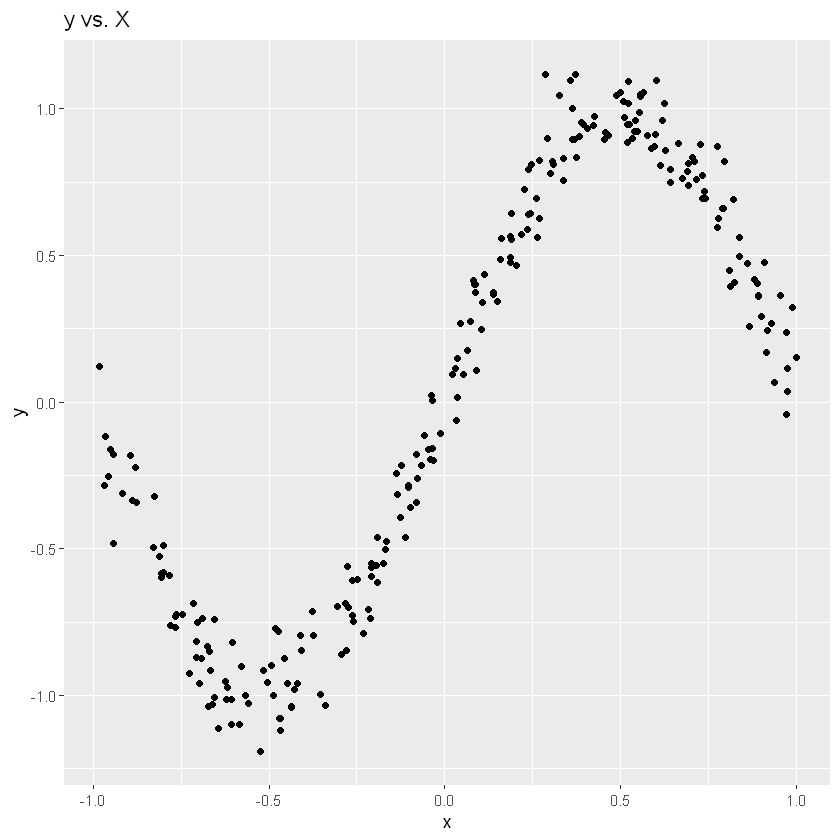

In [24]:
ggplot(df2, aes(x = x, y = y)) + 
    geom_point() + 
    ggtitle("y vs. X")

In [25]:
predict = tanh(initialsecondW %*% rbind(rep(1, nrow(df2)) ,tanh(t(initialfirstW) %*% t(cbind(rep(1, nrow(df2)), df2[,1])))))
df2["prediction"] = t(predict)

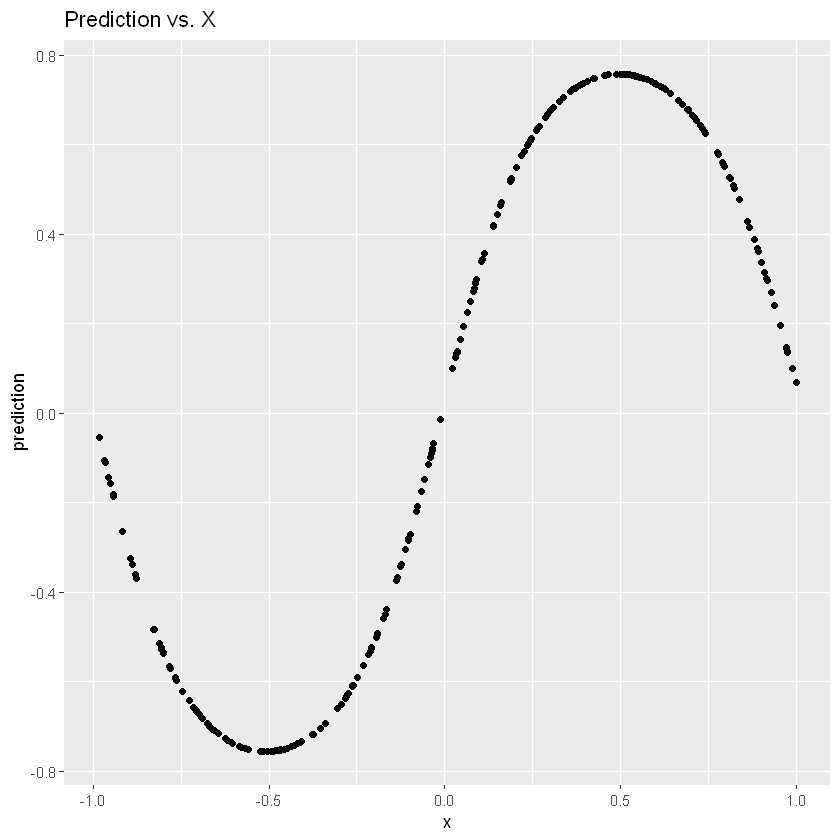

In [26]:
ggplot(df2, aes(x = x, y = prediction)) + 
    geom_point() + 
    ggtitle("Prediction vs. X")